# Example of SGD usage with [Iris dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork

Iris dataset has 4 inputs and 3 classes corresponding 3 Iris species.

In [2]:
number_of_inputs = 4
number_of_outputs = 3

In [3]:
with open("iris.data") as fin:
    lines = fin.readlines()
    X, y, types = [], [], []
    encode_types = {}
    for line in lines:
        X.append([float(x) for x in line.strip().split(",")[:number_of_inputs]])
        types.append(line.strip().split(",")[-1])
    for (ind, t) in enumerate(set(types)):
        encode_types[t] = ind
    if (len(encode_types) < 3):
        for k in range(len(types)):
            y.append([encode_types[types[k]]])
    else:
        for k in range(len(types)):
            y.append([0]*len(encode_types))
            y[k][encode_types[types[k]]] = 1
X = np.array(X)
y = np.array(y)

In [4]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
y[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

First 10 examples. 1 in 3rd position in y corresponds to 3rd class, same with 1st and 2nd.

In [6]:
n = NeuralNetwork.Network((number_of_inputs,5,number_of_outputs))

Initialize neural network with 4 neurons in input layer, 5 in hidden layer and 3 in output layer. Also, there one hidden neuron in input and hidden layers. All weights are initialized randomly.

In [7]:
train_index = np.random.choice(np.arange(len(y)), int(len(y)/3), replace = False)
test_index = np.array([], dtype = int)
for i in range(len(y)):
    if i not in train_index:
        test_index = np.append(test_index, i)
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

Randomly select 50 examples for training dataset and 100 for testing.

In [8]:
alpha = 0.1
BatchSize = 5

These are learning parameters. alpha is learning rate and BatchSize is size of data batch used to compute gradient.

In [9]:
J = n.SGD(X_train, y_train, alpha = alpha, BatchSize = BatchSize, eps = 1e-5, MaxIter = 5000)

iteration 1 	 J = 2.099190183038554
iteration 2 	 J = 1.9899090295330013
iteration 3 	 J = 1.91368862977742
iteration 4 	 J = 1.845464818817108
iteration 5 	 J = 1.7914220137526675
iteration 6 	 J = 1.7465412958019222
iteration 7 	 J = 1.7054569102342592
iteration 8 	 J = 1.6651278807226277
iteration 9 	 J = 1.6237811194743277
iteration 10 	 J = 1.5799914844219831
iteration 11 	 J = 1.5332004472452474
iteration 12 	 J = 1.485961358422841
iteration 13 	 J = 1.4402936980561607
iteration 14 	 J = 1.3970066128297718
iteration 15 	 J = 1.3567935072184412
iteration 16 	 J = 1.3200330098079847
iteration 17 	 J = 1.2868015566858946
iteration 18 	 J = 1.256964733786338
iteration 19 	 J = 1.2302651864070064
iteration 20 	 J = 1.2063891277613679
iteration 21 	 J = 1.1850102612379818
iteration 22 	 J = 1.1658155532357206
iteration 23 	 J = 1.1485183276177993
iteration 24 	 J = 1.1328633467985112
iteration 25 	 J = 1.1186272608865693
iteration 26 	 J = 1.105616641257376
iteration 27 	 J = 1.0936649

Perform gradient descent to fit parameters. eps = 1e-5 means that algorithm stops when absolute difference in cost function values between two iterations is less than 0.00001.

In [10]:
accuracy_train = 0
for k in range(len(y_train)):
    accuracy_train += np.argmax(n.h(X_train[k])) == np.argmax(y_train[k])
print(f"\naccuracy on train = {accuracy_train/len(y_train)} ({accuracy_train}/{len(y_train)})")

accuracy_test = 0
for k in range(len(y_test)):
    #print(n.h(X_test[k]), np.argmax(n.h(X_test[k])) == np.argmax(y_test[k]))
    accuracy_test += np.argmax(n.h(X_test[k])) == np.argmax(y_test[k])
print(f"accuracy on test = {accuracy_test/len(y_test)} ({accuracy_test}/{len(y_test)})")


accuracy on train = 0.98 (49/50)
accuracy on test = 0.97 (97/100)


Check accuracy on training and testing datasets.

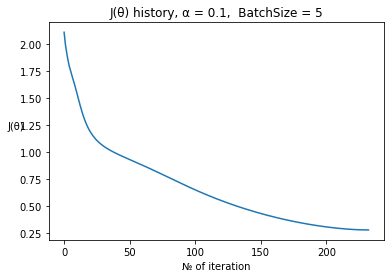

In [11]:
plt.plot(J)
plt.title(f'J(θ) history, α = {alpha},  BatchSize = {BatchSize}')
plt.xlabel('№ of iteration')
plt.ylabel('J(θ)', rotation = 0)
plt.show()

Plot cost function J values depending on number of iteration.

In [12]:
demo_index = np.random.choice(np.arange(len(y)), 10, replace = False)
np.set_printoptions(suppress=True)
print("neural network output \t\t\t correct output \t equals?")
for i in demo_index:
    print(f"{n.h(X[i])} \t {y[i]} \t\t {np.argmax(n.h(X[i])) == np.argmax(y[i])}")


neural network output 			 correct output 	 equals?
[0.00482499 0.56928235 0.37181301] 	 [0 1 0] 		 True
[0.00169433 0.07481708 0.97706442] 	 [0 0 1] 		 True
[0.00881927 0.59861608 0.33154873] 	 [0 1 0] 		 True
[0.00188057 0.08025404 0.97435081] 	 [0 0 1] 		 True
[0.00180088 0.08195824 0.97345253] 	 [0 0 1] 		 True
[0.05765606 0.91467119 0.02283111] 	 [0 1 0] 		 True
[0.1488518  0.93611779 0.01080252] 	 [0 1 0] 		 True
[0.97579382 0.04959109 0.00066196] 	 [1 0 0] 		 True
[0.00551921 0.72924434 0.16624484] 	 [0 1 0] 		 True
[0.97605672 0.0487006  0.00065837] 	 [1 0 0] 		 True


Compare some neural network outputs with correct ones.